#Zadanie 1a (3 pkt)
Celem zadania jest rozwiązanie problemu plecakowego dwoma metodami - brute force oraz według zadanej heurystyki. Należy zaimplementować metody klasy *KnapSack* - *solve_knapsack_brute_force* oraz *solve_knapsack_pw_ratio*. Poprzez rozwiązanie problemu rozumiemy podanie które przedmioty (indeksy w tablicy) należy spakować do plecaka oraz jaka jest sumaryczna wartość i masa plecaka. Punktacja wygląda następująco:


*   Rozwiązanie problemu metodą brute force. *Podpowiedź: do wygenerowania wszystkich permutacji można użyć funkcji product z biblioteki itertools* - **1.5 pkt**
*   Rozwiązanie problemu według heurystyki - do plecaka pakujemy przedmioty według stosunku wartości do wagi - **1 pkt**
*   Dla metody brute force proszę wygenerować wykres zależności czasu wykonywania metody od liczby elementów w tablicach *weights* i *profits* (do obu tablic należy stopniowo dopisywać po jednym elemencie, np. 10-krotnie, wartości elementów nie mają znaczenia). Proszę również odpowiedzieć na pytania (w osobnej komórce tekstowej) - czy obie metody mają takie same rozwiązania? Jakie są Pani / Pana wnioski? - **0.5 pkt**




In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import itertools
import gc
import time
import copy
import random

In [3]:
weights = np.array([8, 3, 5, 2])
capacity = 9
profits = np.array([16, 8, 9, 6])

In [1]:
class KnapSack:
  def __init__(self, profits, weights, capacity):
    self.profits = profits
    self.weights = weights
    self.capacity = capacity

  @property
  def item_count(self):
    return len(self.weights)

  def calc_knapsack_weight(self, item_count, best_combination):
    return sum(self.weights[i] for i in range(item_count) if best_combination[i] == 1)

  def solve_knapsack_brute_force(self):
    if self.item_count == 0 or capacity == 0:
      return [], 0, 0

    max_profit = 0
    best_combination = []
  
    all_combinations = itertools.product([0, 1], repeat=self.item_count)
    #  all combinations of binary numbers of len=item_count
    #  ==> [[0, 0, 0, .., 0], [1, 0, 0, .., 0], ..]

    for combination in all_combinations:
      comb_weight_sum = 0
      comb_profit_sum = 0

      for i in range(self.item_count):
        if combination[i] == 1:       # if item is being taken
          comb_weight_sum += self.weights[i]
          comb_profit_sum += self.profits[i]  # we add their weight and profits to the sum
      
      if comb_weight_sum <= capacity and comb_profit_sum > max_profit:
        # if weight of combination items does not exceed capacity and profit is better than earlier one
        max_profit = comb_profit_sum
        best_combination = combination
    
    knapsack_weight = self.calc_knapsack_weight(self.item_count, best_combination);

    return best_combination, max_profit, knapsack_weight

  def calc_pw_ratio(self):
    return [p / w for p, w in zip(self.profits, self.weights)]

  def solve_knapsack_pw_ratio(self):
    if self.item_count == 0 or capacity == 0:
      return [], 0, 0
    
    ratios = self.calc_pw_ratio()
    items = [(i, self.profits[i], self.weights[i], ratios[i]) for i in range(self.item_count)]
    items.sort(key=lambda x: x[3], reverse=True)

    comb_weight_sum = 0
    comb_profit_sum = 0
    best_combinaiton = [0] * self.item_count

    for item in items:
      idx = item[0]
      profit = item[1]
      weight = item[2]

      if comb_weight_sum + weight <= capacity:
        comb_weight_sum += weight
        comb_profit_sum += profit
        best_combinaiton[idx] = 1   # sign the item as added
      
      else: break
    
    return best_combinaiton, comb_profit_sum, comb_weight_sum

      
    

In [9]:
class TimeMeasurer:

    @staticmethod
    def manage_gc(disable):
        if disable:
            gc.disable()

    @staticmethod
    def measure(func, disable_gc=False):
        TimeMeasurer.manage_gc(disable_gc)

        start_time = time.time()
        result = func()
        end_time = time.time()

        TimeMeasurer.manage_gc(disable_gc)

        return end_time - start_time

In [13]:
class Plotter:
    def __init__(self):
        self.ITERS = 10
        self.ITEM_WEIGHT_THRESHOLD = 15
        self.ITEM_PROFIT_THRESHOLD = 20
        self.brute_force_data = self.generate_brute_force_data()

    def generate_brute_force_data(self):

        execution_times = []
        item_counts = []

        weights_cpy = copy.deepcopy(weights)
        profits_cpy = copy.deepcopy(profits)

        knapsack = KnapSack(copy.deepcopy(profits_cpy), copy.deepcopy(weights_cpy), capacity)
        
        for _ in range(self.ITERS):

            knapsack = KnapSack(profits_cpy, weights_cpy, capacity)
            
            exec_time = TimeMeasurer.measure(knapsack.solve_knapsack_brute_force)
            execution_times.append(exec_time)

            item_counts.append(knapsack.item_count)

            weights_cpy = np.append(weights_cpy, random.randint(1, self.ITEM_WEIGHT_THRESHOLD))
            profits_cpy = np.append(profits_cpy, random.randint(1, self.ITEM_PROFIT_THRESHOLD))

        return execution_times, item_counts

    def generate_brute_force_plot(self):
        
        exec_times = self.brute_force_data[0]
        item_counts = self.brute_force_data[1]

        TITLE = "Problem Plecakowy | Brute Force | Wykres czasu wykonywania od liczby elementów w tablicach"
        X_LABEL = "Liczba elementów"
        Y_LABEL = "Czas wykonywania (s)"

        plt.plot(item_counts, exec_times, marker='o', linestyle='-', color='b')
        
        plt.title(TITLE)
        plt.xlabel(X_LABEL)
        plt.ylabel(Y_LABEL)

        plt.grid(True)

        plt.show()
        



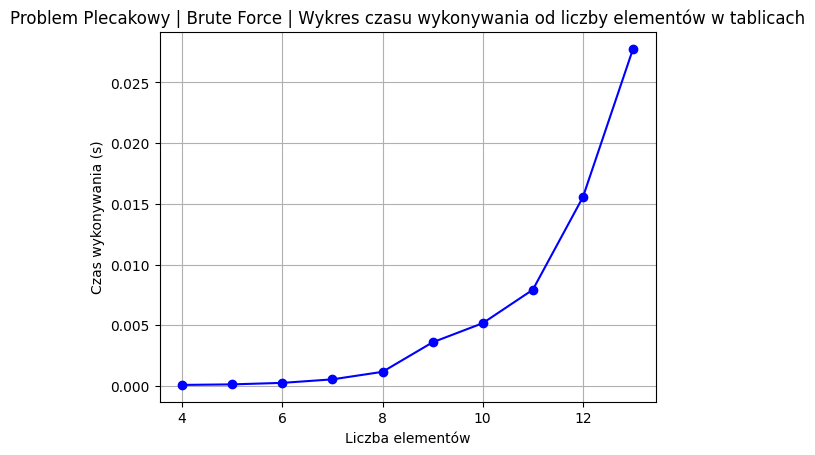

In [14]:
plotter = Plotter()
plotter.generate_brute_force_plot()